In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import chi2

In [47]:
df=pd.read_csv('conversion_data.csv')

In [71]:
df.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

# Let is see graphs that influence for converstion:

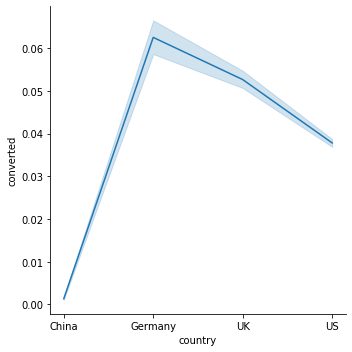

In [19]:
sns.relplot(x='country', y='converted', data= df, kind="line")

country doesn's seem influence for converstion

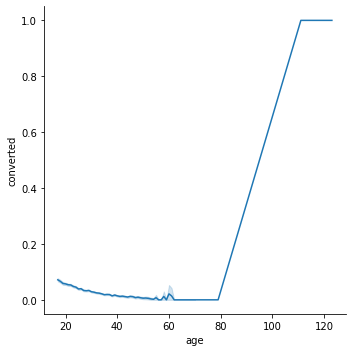

In [5]:
sns.relplot(x='age', y='converted', data= df, kind="line")

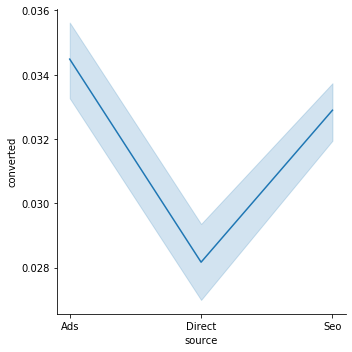

In [8]:
sns.relplot(x='source', y='converted', data= df, kind="line")

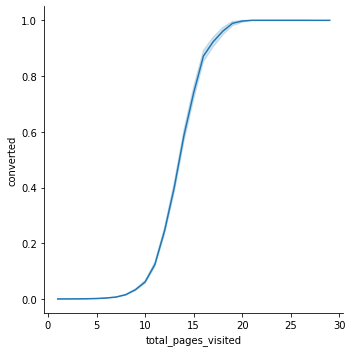

In [9]:
sns.relplot(x='total_pages_visited', y='converted', data= df, kind="line")

# Total page visit seems have an influence for converstion

In [91]:
df.shape

(316200, 6)

In [94]:
# Finding out the correlation between the attributes
corr = df.corr()
corr.shape

(4, 4)

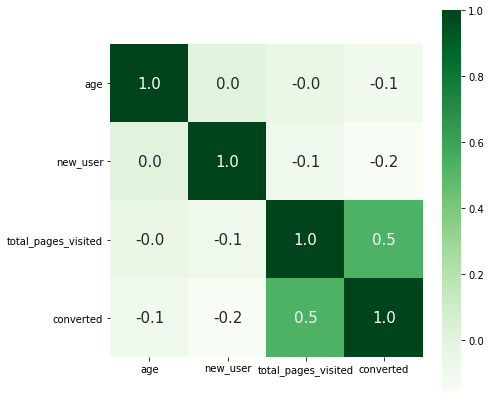

In [105]:
# Plotting the heatmap of correlation between attributes
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

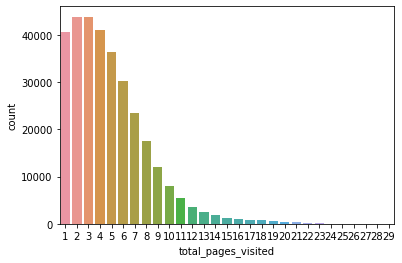

In [117]:
sns.countplot(x='total_pages_visited', data=df)

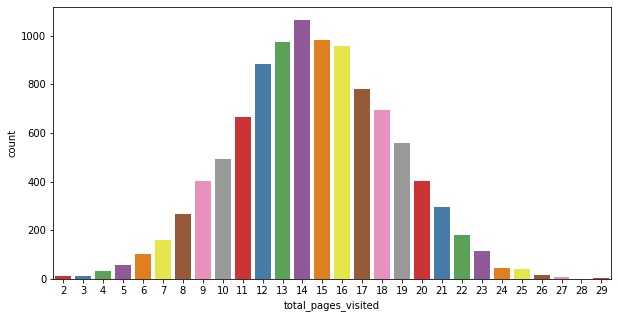

In [118]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df[df['converted'] == 1],
    x='total_pages_visited',
    palette='Set1')

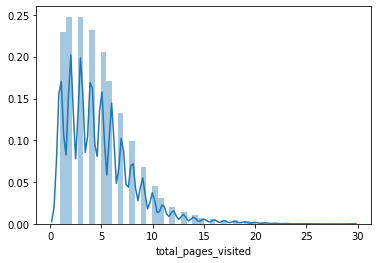

In [115]:
sns.distplot(df['total_pages_visited'])

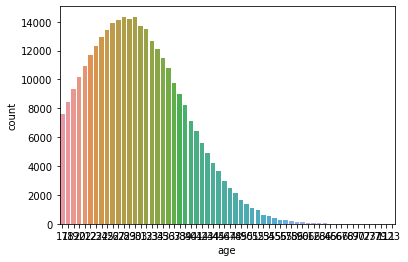

In [119]:
sns.countplot(x='age', data=df)

In [49]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [50]:
X=pd.get_dummies(X, drop_first=True)
X

,age,new_user,total_pages_visited,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,1,0,0,0
1,23,1,5,0,0,1,0,1
2,28,1,4,0,0,1,0,1
3,39,1,5,0,0,0,0,1
4,30,1,6,0,0,1,0,1
...,...,...,...,...,...,...,...,...
316195,26,1,9,0,0,1,0,0
316196,27,1,6,0,0,1,1,0
316197,25,0,4,0,0,0,0,0
316198,22,0,4,0,0,1,0,1


In [74]:
X.columns

Index(['age', 'new_user', 'total_pages_visited', 'country_Germany',
       'country_UK', 'country_US', 'source_Direct', 'source_Seo'],
      dtype='object')

In [51]:
#Let's split data into train and test with 80%, 20% size:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2)

In [52]:
X_train

,age,new_user,total_pages_visited,country_Germany,country_UK,country_US,source_Direct,source_Seo
295243,40,1,10,0,0,1,0,1
271982,39,1,5,0,0,0,0,1
246820,20,1,2,0,0,0,0,1
144089,30,1,5,0,0,1,0,0
124446,22,1,6,0,0,0,0,0
...,...,...,...,...,...,...,...,...
135515,37,1,6,0,0,0,1,0
287936,43,1,5,0,0,1,0,0
267215,36,0,4,0,0,1,1,0
216867,29,1,9,0,0,0,1,0


In [53]:
#Let's normalize the data
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [54]:
#Using Logistic Regression:
logisticreg = LogisticRegression()
logisticreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
#Checking the score of train data
logisticreg.score(X_train, y_train)

0.9861914927261227

In [58]:
#Checking the score of test data
logisticreg.score(X_test, y_test)

0.9862270714737508

In [59]:
#Checking the score after Cross Validation (10 times)
moyen = cross_val_score(logisticreg,X_test, y_test, cv=10).mean()
moyen

0.9862745098039216

In [60]:
#Checking the Standard Division score after Cross Validation (10 times)
std = cross_val_score(logisticreg,X_test, y_test, cv=10).std()
std

0.0009920548476507222

In [66]:
y_pred=logisticreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

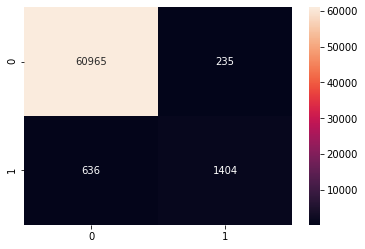

In [69]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [90]:
#Let's test with Chi2 test
dataset=sklearn.feature_selection.chi2(X, y)
dataset

(array([5.58042574e+03, 2.30914908e+03, 2.02697509e+05, 3.82500000e+02,
        6.44210526e+02, 1.75257732e+02, 3.87887324e+01, 2.01315789e+00]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.55366590e-085,
        4.05710472e-142, 5.25926285e-040, 4.72245974e-010, 1.55940432e-001]))

In [76]:
data2 = {'Chi2 Score':dataset[0], 'P-value':dataset[1]}
df2 = pd.DataFrame(data2, index =['age', 'new_user', 'total_pages_visited', 'country_Germany','country_UK', 'country_US', 'source_Direct', 'source_Seo']) 


In [87]:
df2

,Chi2 Score,P-value
age,5580.425744,0.000000e+00
new_user,2309.149077,0.000000e+00
total_pages_visited,202697.509485,0.000000e+00
country_Germany,382.500000,3.553666e-85
country_UK,644.210526,4.057105e-142
country_US,175.257732,5.259263e-40
source_Direct,38.788732,4.722460e-10
source_Seo,2.013158,1.559404e-01


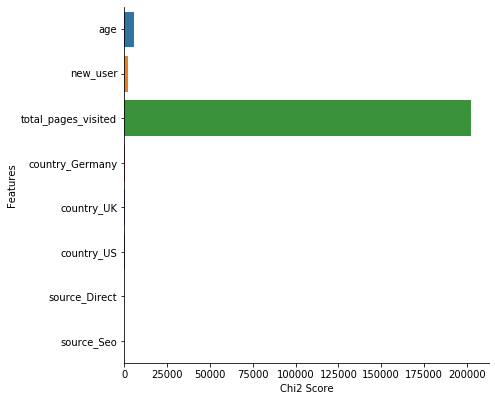

In [88]:
ax = sns.catplot(x=df2.columns[0], y=[index for index in df2.index], height=7, data=df2, kind="bar", legend=False)
ax.set(xlabel='Chi2 Score', ylabel='Features')
plt.show()